In [209]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [210]:
def softmax(h):
    return np.exp(h) / (np.sum(np.exp(h), axis = 1, keepdims =True))

def cross_entropy(y, p):
    return  -np.sum(y*np.log(p))

def accuracy(y, p):
    return np.mean(y == P.argmax(axis = 1))

def feed_forward(X,W1,b1,W2,b2):
    Z1 = np.tanh(np.matmul(X,W1)+b1)
    P = softmax(np.matmul(Z1,W2)+ b2)
    return Z1 , P

def ReLU(h):
    #return np.maximum(h, 0)
    return h*(h>0)
    
def D_ReLU(h):
    #return np.maximum(h, 0)/h
    return (h>0)

def Leaky_ReLU(h,c):
    return h*(h>0) + c*h*(h<0)
    
def D_Leaky_ReLU(h,c):
     return h*(h>0) + c*(h<0)

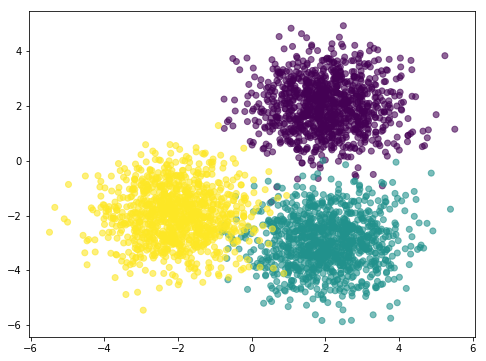

In [211]:
D = 2
K = 3
N = K*1000

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([2,-3])
X2 = np.random.randn((N//K),D) + np.array([-2,-2])
X = np.vstack((X0, X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.figure(figsize = (8,6))
plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.6)

In [212]:
#X = np.hstack((np.ones((X.shape[0],1)), X))

In [213]:
Y = pd.get_dummies(y)

In [214]:
Y = np.array(Y)

In [215]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [216]:
# build the model

# this is a hyper value need to find the best M1 in real project
M1 = 4

W1 = np.random.randn(X.shape[1],M1)
b1 = np.random.randn(M1)
W2 = np.random.randn(M1,K)
b2 = np.random.randn(K)



In [217]:
P = feed_forward(X,W1,b1,W2,b2)[1]

print("Accyracy: {}".format(accuracy(y,P)))

Accyracy: 0.3363333333333333


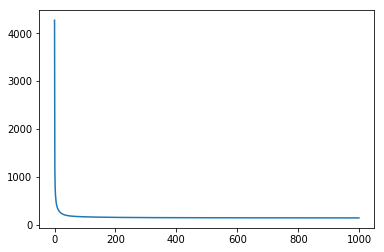

In [218]:
#Reinit M1,W1,b1,W2,b2

#train the model

J = []

eta = 3e-4

epochs= int(1e3)

for epoch in range (epochs):
    Z1,P = feed_forward(X,W1,b1,W2,b2)
    
    J.append(cross_entropy(Y,P))
    
    dW2= np.matmul(Z1.T,P-Y)
    db2 = (P-Y).sum(axis = 0)
    W2 -= eta*dW2
    b2 -= eta*db2
    
    dW1 = np.matmul(X.T, np.matmul(P-Y,W2.T)*(1-Z1*Z1))
    db1 = ( np.matmul(P-Y,W2.T)*(1-Z1*Z1)).sum(axis =0)
    W1-= eta*dW1
    b1-= eta*db1
    

    
plt.plot(J)
    

In [219]:
P = feed_forward(X,W1,b1,W2,b2)[1]

print("Accyracy: {}".format(accuracy(y,P)))

Accyracy: 0.9816666666666667


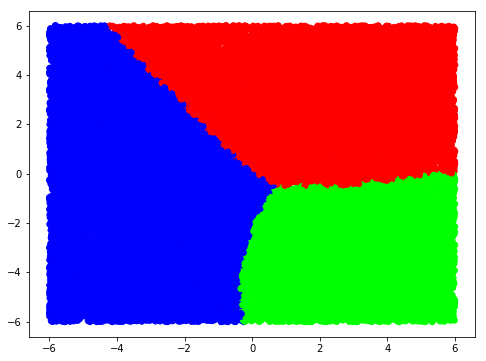

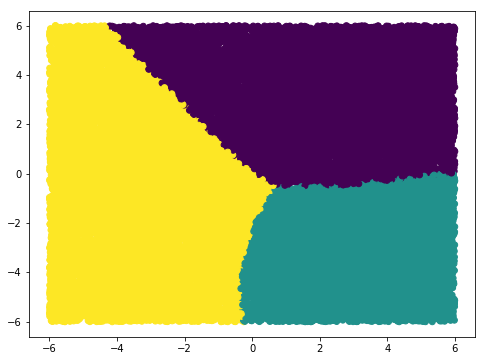

In [240]:
X_vis = np.random.uniform(-6,6, (int(10*N),D))

p_vis = feed_forward(X_vis,W1,b1,W2,b2)[-1]
        #softmax(X.dot(w))
y_hat = (p_vis == p_vis.max(axis=1)[:,None]).astype(int)

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c= y_hat)
plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c= p_vis.argmax(axis =1))

In [ ]:
+/